In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Carregar o dataset e tratar as colunas deadline e launched como datas
projetos = pd.read_csv(r'C:\Users\Fabasa79\Desktop\Turing\ks-projects-201801.csv')

# Observações iniciais

Usaremos os métodos .head(), .info() e .describe() para ter uma noção geral de como o dataset está estruturado.

In [17]:
projetos.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Aqui, podemos dizer que as categorias *main_category*, *backers* e *goal* serão as **features** e *state* é a **target**. Portanto, queremos descobrir como as categorias relacionadas aos projetos afetam o seu sucesso.

In [21]:
projetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


A saída de `projetos.info()` acima nos diz que o dataset tem 15 colunas. As colunas *backers* e *ID* são de tipo inteiro. As colunas *goal*, *pledged*, *usd pledged*, *usd_pledged_real* e *usd_goal_real* são floats. Todas as outras colunas são do tipo *object*. A anotação `non-null` nos diz que não há dados faltantes.

<function matplotlib.pyplot.show(*args, **kw)>

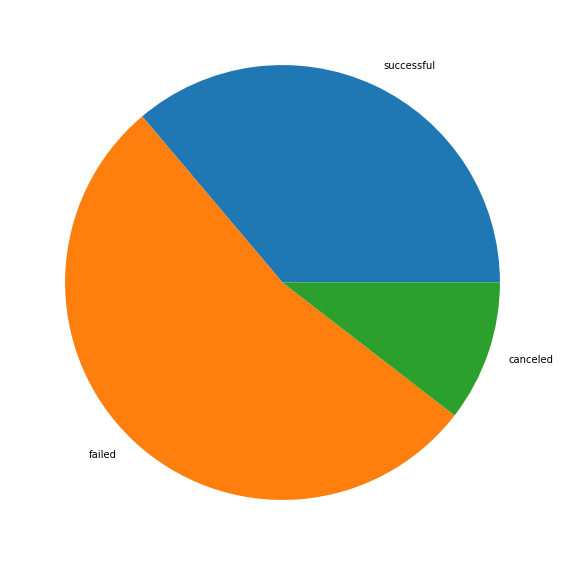

In [47]:
Sucesso = len(projetos[projetos['state'] == 'successful'])
Falha = len(projetos[projetos['state'] == 'failed'])
Cancelado = len(projetos[projetos['state'] == 'canceled'])
y = [Sucesso, Falha, Cancelado]
x = ['successful', 'failed', 'canceled']
plt.pie(y, labels = x)
plt.show

A primeira coisa que vamos fazer na análise desta *feature* é analisar o perfil geral da nossa *target*. Ou seja, aqui queremos simplesmente dizer qual a proporção de projetos que obtiveram sucesso, fracasso ou cancelamento. Como não é interessante analisarmos os projetos que foram cancelados, vamos novamente montar este gráfico de setores excluindo esta categoria.

<function matplotlib.pyplot.show(*args, **kw)>

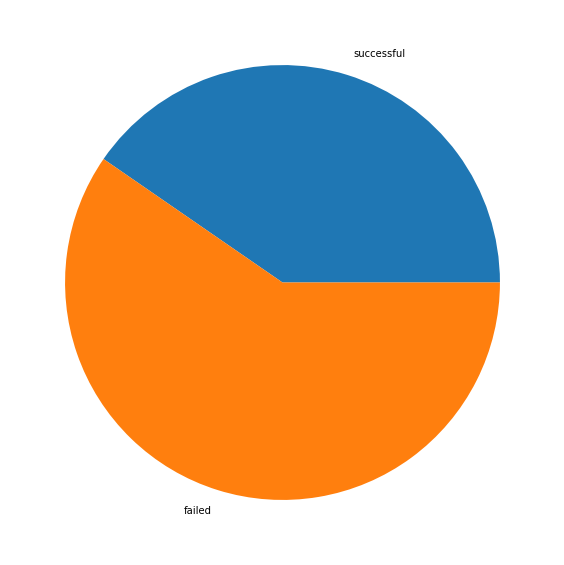

In [46]:
Sucesso = len(projetos[projetos['state'] == 'successful'])
Falha = len(projetos[projetos['state'] == 'failed'])
y = [Sucesso, Falha]
x = ['successful', 'failed']
plt.pie(y, labels = x)
plt.show

Aqui, podemos ver que aproximadamente 60% dos projetos falham e 40% obtem sucesso.

# Main Category


O próximo passo da análise consiste em observar como a *feature* **main category** interfere na quantidade de projetos que falham ou obtém sucesso.

In [3]:
geral = projetos
x = len(geral)
Art = len(geral[geral["main_category"] == "Art"])
Comics = len(geral[geral["main_category"] == "Comics"])
Crafts = len(geral[geral["main_category"] == "Crafts"])
Dance = len(geral[geral["main_category"] == "Dance"])
Design = len(geral[geral["main_category"] == "Design"])
Fashion = len(geral[geral["main_category"] == "Fashion"])
FilmVideo = len(geral[geral["main_category"] == "Film & Video"])
Food = len(geral[geral["main_category"] == "Food"])
Games = len(geral[geral["main_category"] == "Games"])
Journalism = len(geral[geral["main_category"] == "Journalism"])
Music = len(geral[geral["main_category"] == "Music"])
Photography = len(geral[geral["main_category"] == "Photography"])
Publishing = len(geral[geral["main_category"] == "Publishing"])
Technology = len(geral[geral["main_category"] == "Technology"])
Theater = len(geral[geral["main_category"] == "Theater"])

<function matplotlib.pyplot.show(*args, **kw)>

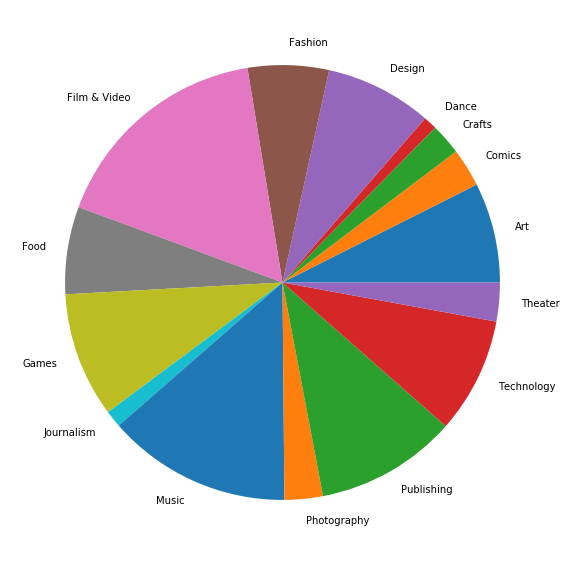

In [38]:
x = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'] # Categorias
y = [Art, Comics, Crafts, Dance, Design, Fashion, FilmVideo, Food, Games, Journalism, Music, Photography, Publishing, Technology, Theater] # Número de ocorrências de cada categoria
plt.pie(y, labels = x)
plt.show

Este gráfico mostra a proporção observada para cada categoria de projeto. Aqui, podemos observar que a maior quantidade de projetos vêm das categorias **Film & Video**(aprox. 16,79%) e **Music**(aprox. 13,71%).

In [4]:

geral = projetos[projetos["state"] == "successful"]
x = len(geral)
Art = len(geral[geral["main_category"] == "Art"])
Comics = len(geral[geral["main_category"] == "Comics"])
Crafts = len(geral[geral["main_category"] == "Crafts"])
Dance = len(geral[geral["main_category"] == "Dance"])
Design = len(geral[geral["main_category"] == "Design"])
Fashion = len(geral[geral["main_category"] == "Fashion"])
FilmVideo = len(geral[geral["main_category"] == "Film & Video"])
Food = len(geral[geral["main_category"] == "Food"])
Games = len(geral[geral["main_category"] == "Games"])
Journalism = len(geral[geral["main_category"] == "Journalism"])
Music = len(geral[geral["main_category"] == "Music"])
Photography = len(geral[geral["main_category"] == "Photography"])
Publishing = len(geral[geral["main_category"] == "Publishing"])
Technology = len(geral[geral["main_category"] == "Technology"])
Theater = len(geral[geral["main_category"] == "Theater"])



<function matplotlib.pyplot.show(*args, **kw)>

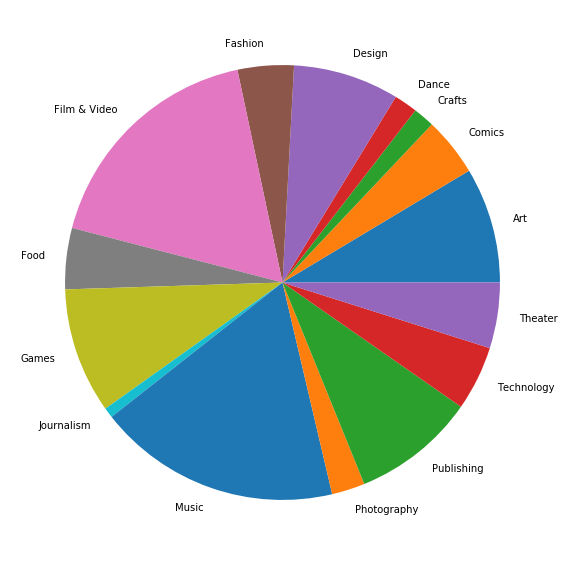

In [40]:
x = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'] # Categorias
y = [Art, Comics, Crafts, Dance, Design, Fashion, FilmVideo, Food, Games, Journalism, Music, Photography, Publishing, Technology, Theater] # Número de ocorrências de cada categoria
plt.pie(y, labels = x)
plt.show


Este gráfico mostra a proporção de cada categoria de projetos que obtiveram sucesso. Aqui, podemos novamente observar que as categorias que se destacam são **Film & Video**(aprox. 17,63%) e **Music**(aprox. 18,06%). Portanto, vamos criar abaixo um outro gráfico, que mostra proporcionalmente quais são as categorias que mais se destacam. Este gráfico mostra proporcionalmente o quanto cada categoria tem mais porcentagem de sucessos em relação a sua proporção geral.

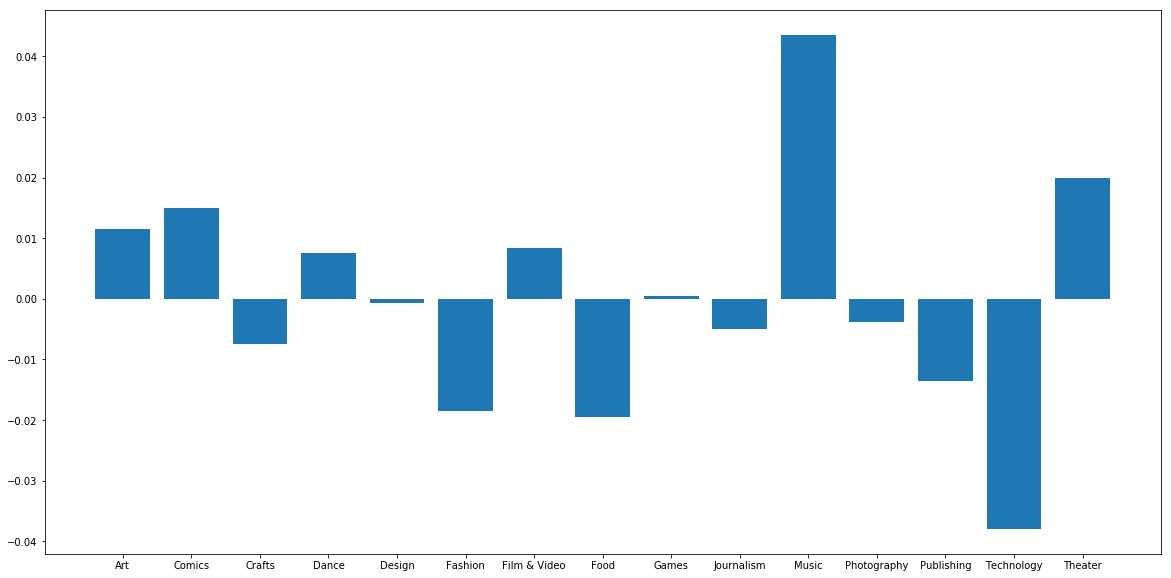

In [41]:
geral = projetos
x = len(geral)
Art0 = len(geral[geral["main_category"] == "Art"])
Comics0 = len(geral[geral["main_category"] == "Comics"])
Crafts0 = len(geral[geral["main_category"] == "Crafts"])
Dance0 = len(geral[geral["main_category"] == "Dance"])
Design0 = len(geral[geral["main_category"] == "Design"])
Fashion0 = len(geral[geral["main_category"] == "Fashion"])
FilmVideo0 = len(geral[geral["main_category"] == "Film & Video"])
Food0 = len(geral[geral["main_category"] == "Food"])
Games0 = len(geral[geral["main_category"] == "Games"])
Journalism0 = len(geral[geral["main_category"] == "Journalism"])
Music0 = len(geral[geral["main_category"] == "Music"])
Photography0 = len(geral[geral["main_category"] == "Photography"])
Publishing0 = len(geral[geral["main_category"] == "Publishing"])
Technology0 = len(geral[geral["main_category"] == "Technology"])
Theater0 = len(geral[geral["main_category"] == "Theater"])

geral = projetos[projetos["state"] == "successful"]
y = len(geral)
Art1 = len(geral[geral["main_category"] == "Art"])
Comics1 = len(geral[geral["main_category"] == "Comics"])
Crafts1 = len(geral[geral["main_category"] == "Crafts"])
Dance1 = len(geral[geral["main_category"] == "Dance"])
Design1 = len(geral[geral["main_category"] == "Design"])
Fashion1 = len(geral[geral["main_category"] == "Fashion"])
FilmVideo1 = len(geral[geral["main_category"] == "Film & Video"])
Food1 = len(geral[geral["main_category"] == "Food"])
Games1 = len(geral[geral["main_category"] == "Games"])
Journalism1 = len(geral[geral["main_category"] == "Journalism"])
Music1 = len(geral[geral["main_category"] == "Music"])
Photography1 = len(geral[geral["main_category"] == "Photography"])
Publishing1 = len(geral[geral["main_category"] == "Publishing"])
Technology1 = len(geral[geral["main_category"] == "Technology"])
Theater1 = len(geral[geral["main_category"] == "Theater"])

Art = Art1/y - Art0/x
Comics = Comics1/y - Comics0/x
Crafts = Crafts1/y - Crafts0/x
Dance = Dance1/y - Dance0/x
Design = Design1/y - Design0/x
Fashion = Fashion1/y - Fashion0/x
FilmVideo = FilmVideo1/y - FilmVideo0/x
Food = Food1/y - Food0/x
Games = Games1/y - Games0/x
Journalism = Journalism1/y - Journalism0/x
Music = Music1/y - Music0/x
Photography = Photography1/y - Photography0/x
Publishing = Publishing1/y - Publishing0/x
Technology = Technology1/y - Technology0/x
Theater = Theater1/y - Theater0/x

x = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'] # Categorias
y = [Art, Comics, Crafts, Dance, Design, Fashion, FilmVideo, Food, Games, Journalism, Music, Photography, Publishing, Technology, Theater] # Número de ocorrências de cada categoria
plt.bar(x,y)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

Deste gráfico, tiramos que a categoria com maior proporção de sucessos é **Music** e a categoria com menos é **Technology**.

# Backers

A próxima *feature* que será analisada é *backers*. Agora analisaremos como a quantidade de apoiadores interfere na aprovação ou não de um projeto. Inicialmente vamos analisar o gráfico que trás a quantidade de projetos aprovados em função do número de apoiadores.

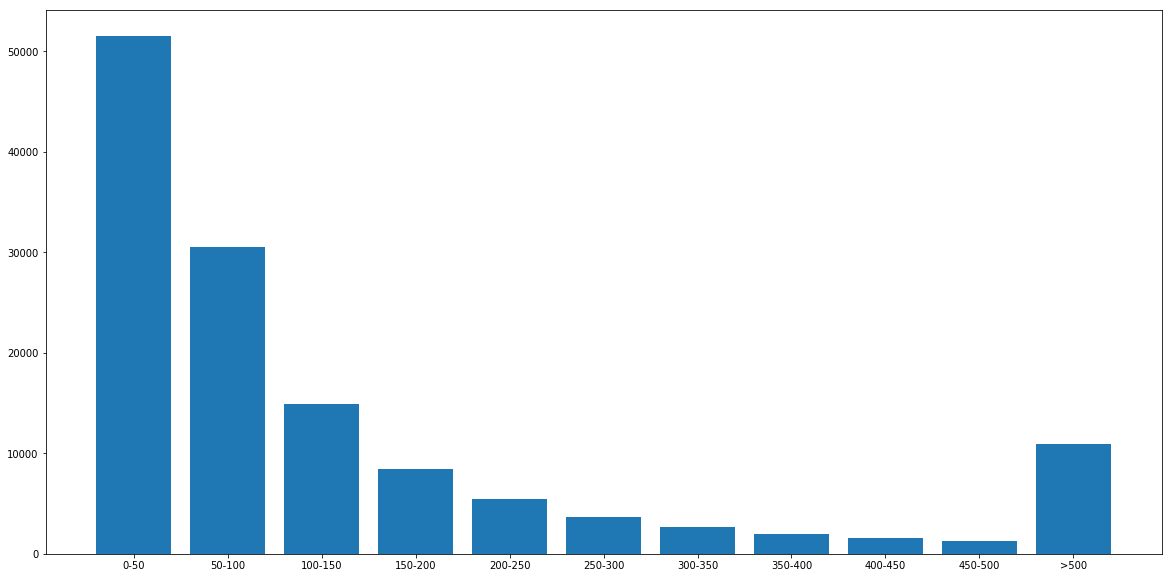

In [42]:
Sucesso = projetos[projetos['state'] == 'successful']
a =[0]*11
a[0] = len(Sucesso[Sucesso["backers"] <=50])
a[1] = len(Sucesso[Sucesso["backers"] <=100])-a[0]
a[2] = len(Sucesso[Sucesso["backers"] <=150])- len(Sucesso[Sucesso["backers"] <=100])
a[3] = len(Sucesso[Sucesso["backers"] <=200])-len(Sucesso[Sucesso["backers"] <=150])
a[4] = len(Sucesso[Sucesso["backers"] <=250])-len(Sucesso[Sucesso["backers"] <=200])
a[5] = len(Sucesso[Sucesso["backers"] <=300])-len(Sucesso[Sucesso["backers"] <=250])
a[6] = len(Sucesso[Sucesso["backers"] <=350])-len(Sucesso[Sucesso["backers"] <=300])
a[7] = len(Sucesso[Sucesso["backers"] <=400])-len(Sucesso[Sucesso["backers"] <=350])
a[8] = len(Sucesso[Sucesso["backers"] <=450])-len(Sucesso[Sucesso["backers"] <=400])
a[9] = len(Sucesso[Sucesso["backers"] <=500]) - len(Sucesso[Sucesso["backers"] <=450])
a[10] = len(Sucesso[Sucesso["backers"] >550])
x = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500",">500"]
plt.bar(x, a)
plt.show()

Este gráfico nos mostra que a maioria dos projetos aceitos possuem entre 0 e 150 apoiadores. Entretanto, vale ressaltar que a quantidade de projetos aprovados com mais de 150 apoiadores está muito longe de ser despresível. 
O próximo passo é analisar o gráfico que trás a quantidade de projetos que não foram aprovados em função do número de apoiadores.


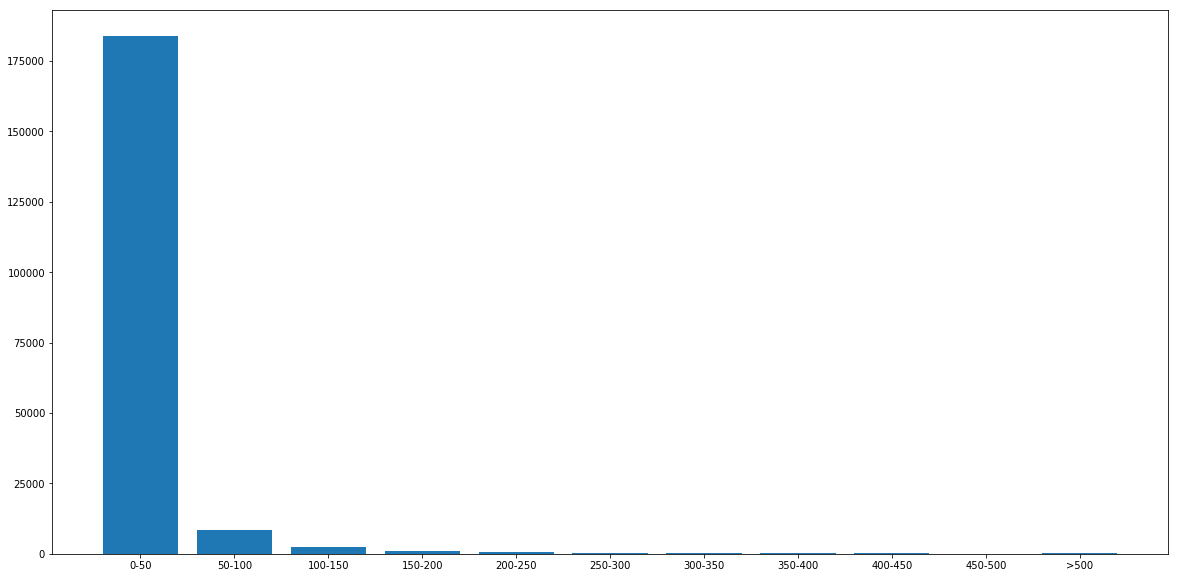

In [43]:
Sucesso = projetos[projetos['state'] == 'failed']
a =[0]*11
a[0] = len(Sucesso[Sucesso["backers"] <=50])
a[1] = len(Sucesso[Sucesso["backers"] <=100])-a[0]
a[2] = len(Sucesso[Sucesso["backers"] <=150])- len(Sucesso[Sucesso["backers"] <=100])
a[3] = len(Sucesso[Sucesso["backers"] <=200])-len(Sucesso[Sucesso["backers"] <=150])
a[4] = len(Sucesso[Sucesso["backers"] <=250])-len(Sucesso[Sucesso["backers"] <=200])
a[5] = len(Sucesso[Sucesso["backers"] <=300])-len(Sucesso[Sucesso["backers"] <=250])
a[6] = len(Sucesso[Sucesso["backers"] <=350])-len(Sucesso[Sucesso["backers"] <=300])
a[7] = len(Sucesso[Sucesso["backers"] <=400])-len(Sucesso[Sucesso["backers"] <=350])
a[8] = len(Sucesso[Sucesso["backers"] <=450])-len(Sucesso[Sucesso["backers"] <=400])
a[9] = len(Sucesso[Sucesso["backers"] <=500]) - len(Sucesso[Sucesso["backers"] <=450])
a[10] = len(Sucesso[Sucesso["backers"] >550])
x = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500",">500"]
plt.bar(x, a)
plt.show()

Este gráfico nos mostra que a maioria esmagadora de projetos que fracassaram teve entre 0 e 50 apoiadores. Restando uma quantidade quase despresível de projetos com mais de 50 apoiadores que não obtiveram sucesso.

# Goal

A última *feature* a ser analisada será *goal*. Ou seja, é hora de analisar a relação entre a quantidade de dinheiro necessária para a execução do projeto com o seu sucesso ou falha.
O primeiro gráfico a ser analisado trás o número de projetos aprovados em função da quantidade de dinheiro necessária para a sua execução.


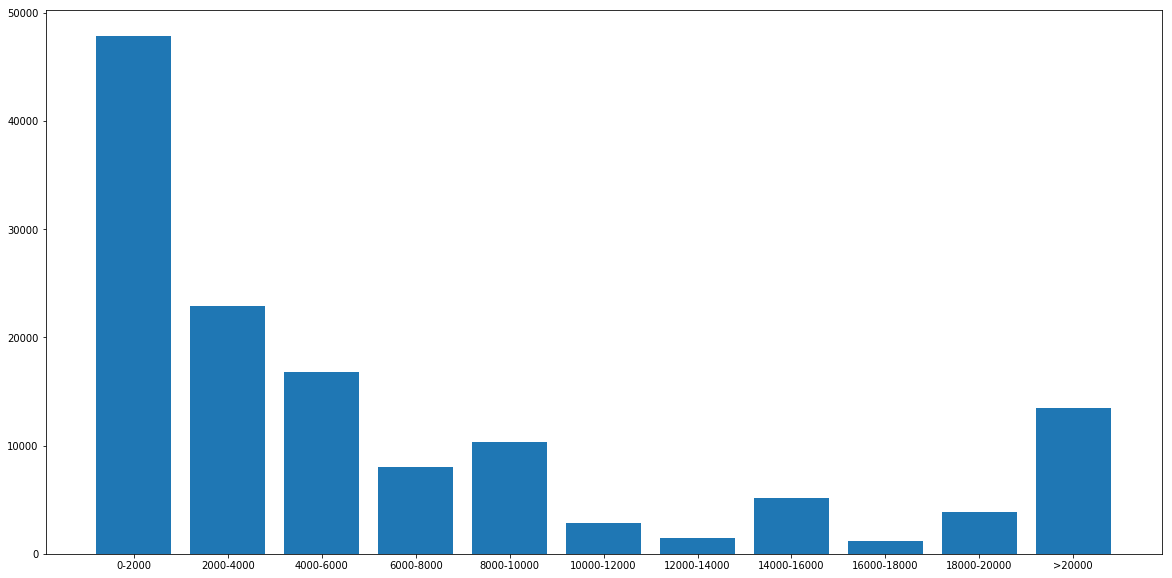

In [44]:
Sucesso = projetos[projetos['state'] == 'successful']
a =[0]*11
a[0] = len(Sucesso[Sucesso["goal"] <=2000])
a[1] = len(Sucesso[Sucesso["goal"] <=4000])-a[0]
a[2] = len(Sucesso[Sucesso["goal"] <=6000])- len(Sucesso[Sucesso["goal"] <=4000])
a[3] = len(Sucesso[Sucesso["goal"] <=8000])- len(Sucesso[Sucesso["goal"] <=6000])
a[4] = len(Sucesso[Sucesso["goal"] <=10000])-len(Sucesso[Sucesso["goal"] <=8000])
a[5] = len(Sucesso[Sucesso["goal"] <=12000])-len(Sucesso[Sucesso["goal"] <=10000])
a[6] = len(Sucesso[Sucesso["goal"] <=14000])-len(Sucesso[Sucesso["goal"] <=12000])
a[7] = len(Sucesso[Sucesso["goal"] <=16000])-len(Sucesso[Sucesso["goal"] <=14000])
a[8] = len(Sucesso[Sucesso["goal"] <=18000])-len(Sucesso[Sucesso["goal"] <=16000])
a[9] = len(Sucesso[Sucesso["goal"] <=20000]) - len(Sucesso[Sucesso["goal"] <=18000])
a[10] = len(Sucesso[Sucesso["goal"] >20000])
x = ["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000", "10000-12000", "12000-14000", "14000-16000", "16000-18000", "18000-20000",">20000"]
plt.bar(x, a)
plt.show()

Aqui, é importante perceber que a maioria dos projetos aprovados não envolve um objetivo em dinheiro muito elevado (a maioria fica entre 0 e 4000 dólares). Mesmo sabendo que a quantidade de projetos mais caros sendo aprovados não é irrelevante, vale notar que estes projetos não concentram o maior índice de sucesso. 
Agora vamos analisar o gráfico que trás o número de projetos reprovados em função da quantidade de dinheiro necessária para a sua execução.


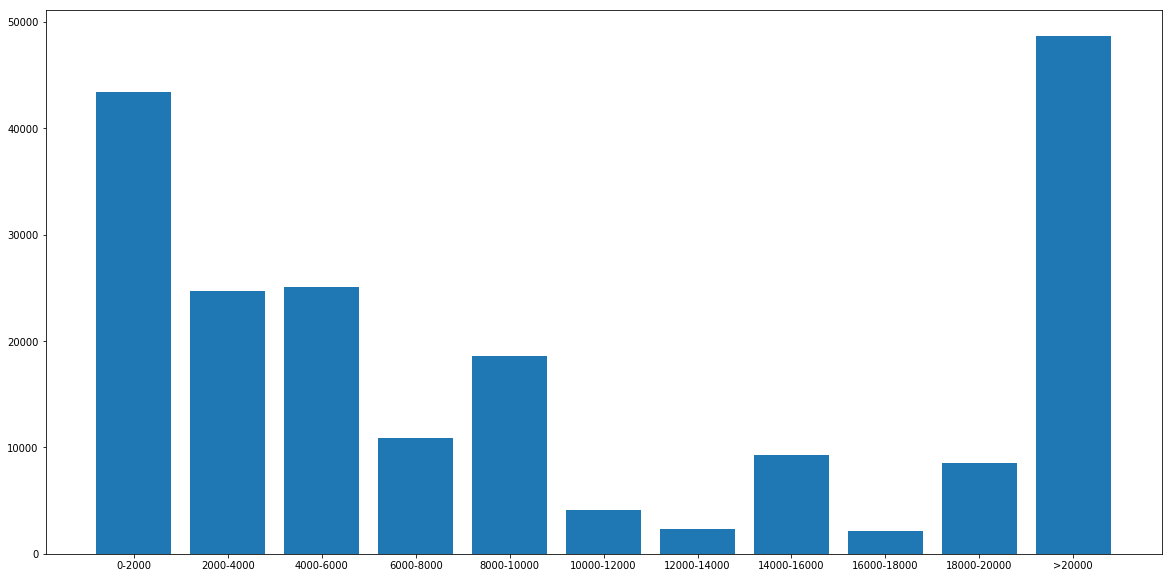

In [45]:
Sucesso = projetos[projetos['state'] == 'failed']
a =[0]*11
a[0] = len(Sucesso[Sucesso["goal"] <=2000])
a[1] = len(Sucesso[Sucesso["goal"] <=4000])-a[0]
a[2] = len(Sucesso[Sucesso["goal"] <=6000])- len(Sucesso[Sucesso["goal"] <=4000])
a[3] = len(Sucesso[Sucesso["goal"] <=8000])- len(Sucesso[Sucesso["goal"] <=6000])
a[4] = len(Sucesso[Sucesso["goal"] <=10000])-len(Sucesso[Sucesso["goal"] <=8000])
a[5] = len(Sucesso[Sucesso["goal"] <=12000])-len(Sucesso[Sucesso["goal"] <=10000])
a[6] = len(Sucesso[Sucesso["goal"] <=14000])-len(Sucesso[Sucesso["goal"] <=12000])
a[7] = len(Sucesso[Sucesso["goal"] <=16000])-len(Sucesso[Sucesso["goal"] <=14000])
a[8] = len(Sucesso[Sucesso["goal"] <=18000])-len(Sucesso[Sucesso["goal"] <=16000])
a[9] = len(Sucesso[Sucesso["goal"] <=20000]) - len(Sucesso[Sucesso["goal"] <=18000])
a[10] = len(Sucesso[Sucesso["goal"] >20000])
x = ["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000", "10000-12000", "12000-14000", "14000-16000", "16000-18000", "18000-20000",">20000"]
plt.bar(x, a)
plt.show()

Aqui vemos um panorama bem diferente. Temos uma grande quantidade de projetos caros (mais de 20000 dólares) sendo rejeitados. Por mais que hajam também muitos projetos mais baratos sendo rejeitados, esta parcela não representa mais a maioria..